<a href="https://colab.research.google.com/github/Pavankuamr14/deeplearning/blob/main/Predicting_Stock_Prices_using_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**we will predict stock prices for the next day, based on the time series patterns observed for the previous days.**

# Setup Environment


In [1]:
!pip install keras
!pip install tensorflow
!pip install pandas
!pip install matplotlib
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


# Load & Split Stock Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(1)

#Load the Meta stock price data from CSV
prices = pd.read_csv('/content/FB-stock-prices.csv')

#Review loaded data
print(prices.dtypes)
prices.head()

Date     object
Price     int64
dtype: object


,Date,Price
0,1/4/2021,269
1,1/5/2021,271
2,1/6/2021,263
3,1/7/2021,269
4,1/8/2021,268


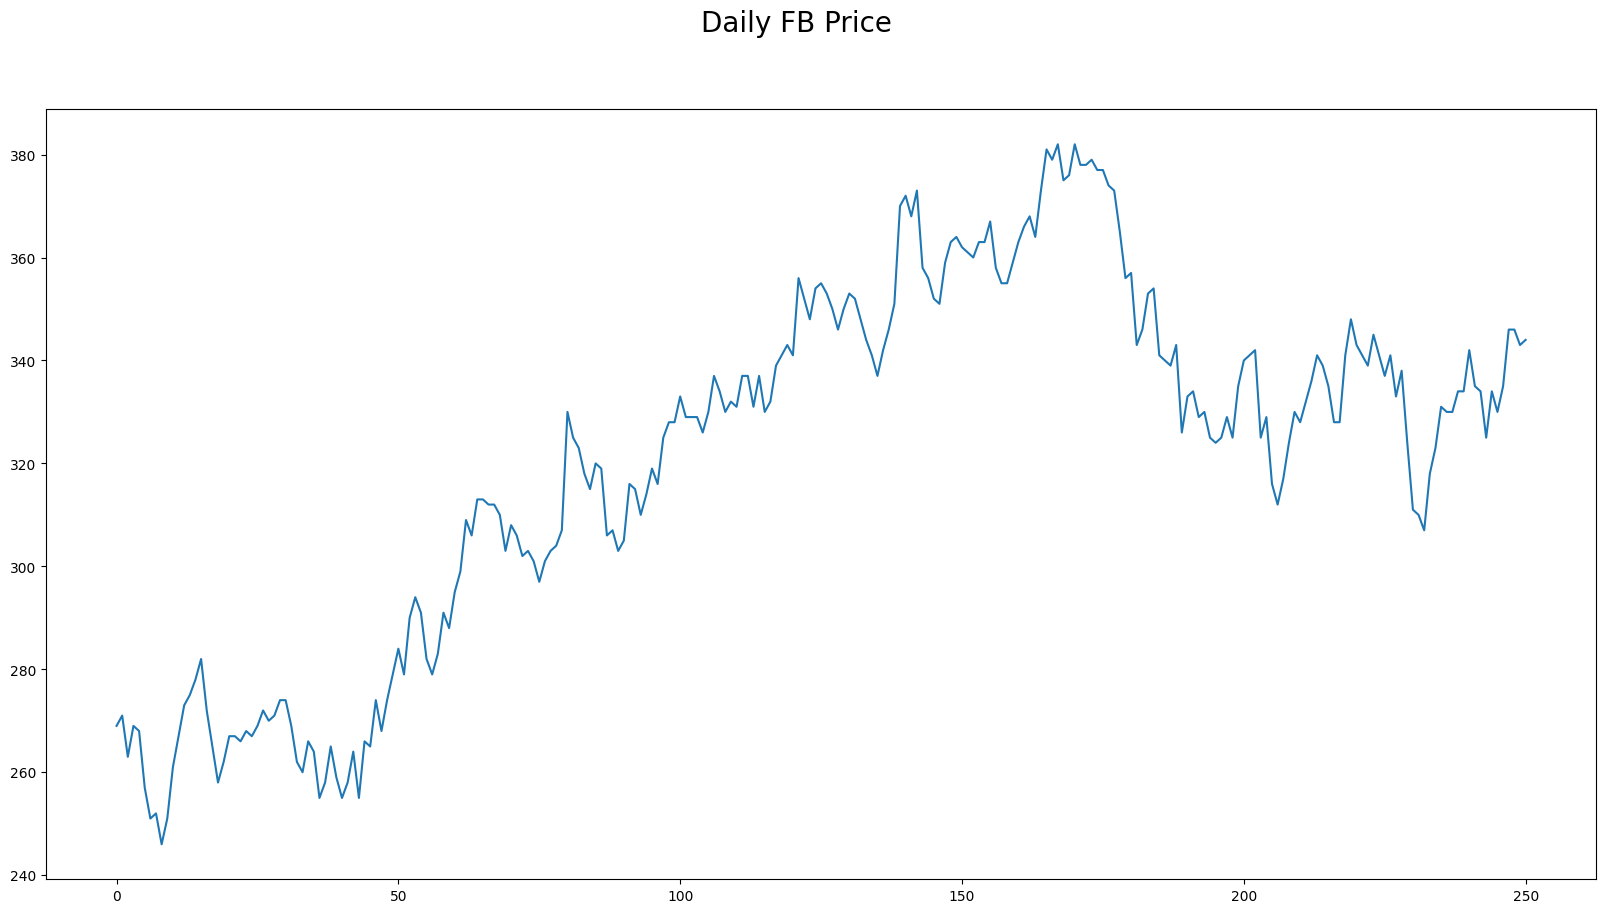

In [3]:
# Plot the data to visualize the stock price

plt.figure(figsize=(20,10)).suptitle("Daily FB Price", fontsize=20)
plt.plot(prices["Price"])
plt.show()

# Split Data

In [11]:
from sklearn.preprocessing import StandardScaler

# Scale the Data
scaler = StandardScaler()
scaled_prices=scaler.fit_transform(prices[["Price"]].values)

#Split data into Training and Test sets
total_size = len(scaled_prices)
print(total_size)
#Test dataset size
test_size = 50
print(test_size)
#Training dataset size
train_size = total_size - test_size
print(train_size, test_size)

training_prices = scaled_prices[0:train_size,:]
test_prices = scaled_prices[train_size:,:]

print(training_prices.shape, test_prices.shape)


251
50
201 50
(201, 1) (50, 1)


# Create Dataset for RNN

In [12]:
#Prepare RNN Dataset.
#Each data point (X) is linked to the previous data points of size=lookback
#The predicted value (Y) is the next point

def create_rnn_dataset(data, lookback=1):

    data_x, data_y = [], []
    for i in range(len(data)- lookback -1):
            #All points from this point, looking backwards upto lookback
            a = data[i:(i+ lookback), 0]
            print(a)
            data_x.append(a)
            print(f"data_x {data_x}")
            #The next point
            data_y.append(data[i + lookback, 0])
            print(f"data_y {data_y}")
    return np.array(data_x), np.array(data_y)

#lookback for 25 previous days
lookback=25

#Create X and Y for training
train_req_x, train_req_y = create_rnn_dataset(training_prices,lookback)

#Reshape for use with RNN
train_req_x = np.reshape(train_req_x,
                         (train_req_x.shape[0],1, train_req_x.shape[1]))

print("Shapes of X, Y: ",train_req_x.shape, train_req_y.shape)

Streaming output truncated to the last 5000 lines.
       -1.61155682, -1.81250106, -1.69767578, -1.55414418, -1.55414418,
       -1.5828505 , -1.52543786, -1.55414418, -1.49673154, -1.41061258,
       -1.46802522, -1.4393189 , -1.35319994, -1.35319994, -1.49673154,
       -1.69767578, -1.75508842, -1.5828505 , -1.64026314, -1.89862003]), array([-1.32449362, -1.23837465, -1.12354937, -1.41061258, -1.61155682,
       -1.81250106, -1.69767578, -1.55414418, -1.55414418, -1.5828505 ,
       -1.52543786, -1.55414418, -1.49673154, -1.41061258, -1.46802522,
       -1.4393189 , -1.35319994, -1.35319994, -1.49673154, -1.69767578,
       -1.75508842, -1.5828505 , -1.64026314, -1.89862003, -1.81250106]), array([-1.23837465, -1.12354937, -1.41061258, -1.61155682, -1.81250106,
       -1.69767578, -1.55414418, -1.55414418, -1.5828505 , -1.52543786,
       -1.55414418, -1.49673154, -1.41061258, -1.46802522, -1.4393189 ,
       -1.35319994, -1.35319994, -1.49673154, -1.69767578, -1.75508842,
       -1

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



data_x [array([-1.49673154, -1.4393189 , -1.66896946, -1.49673154, -1.52543786,
       -1.84120738, -2.01344531, -1.98473899, -2.15697691, -2.01344531,
       -1.7263821 , -1.55414418, -1.38190626, -1.32449362, -1.23837465,
       -1.12354937, -1.41061258, -1.61155682, -1.81250106, -1.69767578,
       -1.55414418, -1.55414418, -1.5828505 , -1.52543786, -1.55414418]), array([-1.4393189 , -1.66896946, -1.49673154, -1.52543786, -1.84120738,
       -2.01344531, -1.98473899, -2.15697691, -2.01344531, -1.7263821 ,
       -1.55414418, -1.38190626, -1.32449362, -1.23837465, -1.12354937,
       -1.41061258, -1.61155682, -1.81250106, -1.69767578, -1.55414418,
       -1.55414418, -1.5828505 , -1.52543786, -1.55414418, -1.49673154]), array([-1.66896946, -1.49673154, -1.52543786, -1.84120738, -2.01344531,
       -1.98473899, -2.15697691, -2.01344531, -1.7263821 , -1.55414418,
       -1.38190626, -1.32449362, -1.23837465, -1.12354937, -1.41061258,
       -1.61155682, -1.81250106, -1.69767578, -1.554

# Build the RNN Model

In [6]:
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense
import tensorflow as tf

tf.random.set_seed(3)

#Create a Keras Model
price_model=Sequential()
#Add Simple RNN layer with 32 nodes
price_model.add(SimpleRNN(32, input_shape=(1,lookback)))
#Add a Dense layer at the end for output
price_model.add(Dense(1))

#Compile with Adam Optimizer. Optimize for minimum mean square error
price_model.compile(loss="mean_squared_error",
                 optimizer="adam",
                 metrics=["mse"])

#Print model summary
price_model.summary()

#Train the model
price_model.fit(train_req_x, train_req_y,
             epochs=5, batch_size=1, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1856      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 1889 (7.38 KB)
Trainable params: 1889 (7.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
175/175 [==============================] - 2s 3ms/step - loss: 0.2072 - mse: 0.2072
Epoch 2/5
175/175 [==============================] - 0s 2ms/step - loss: 0.0722 - mse: 0.0722
Epoch 3/5
175/175 [==============================] - 0s 2ms/step - loss: 0.0588 - mse: 0.0588
Epoch 4/5
175/175 [==============================] - 0s 2ms/step - loss: 0.0466 - mse: 0.0466
Epoch 5/5
175/175 [=========================

# Test the Model

In [7]:
#Preprocess the test dataset, the same way training set is processed
test_req_x, test_req_y = create_rnn_dataset(test_prices,lookback)

print(test_req_x.shape, test_req_y.shape)

test_req_x = np.reshape(test_req_x,
                         (test_req_x.shape[0],1, test_req_x.shape[1]))

#Evaluate the model
price_model.evaluate(test_req_x, test_req_y, verbose=1)

#Predict on the test dataset
predict_on_test = price_model.predict(test_req_x)

#Inverse the scaling to view results
predict_on_test = scaler.inverse_transform(predict_on_test)

(24, 25) (24,)
1/1 [==============================] - 0s 291ms/step


# Visualize the Results

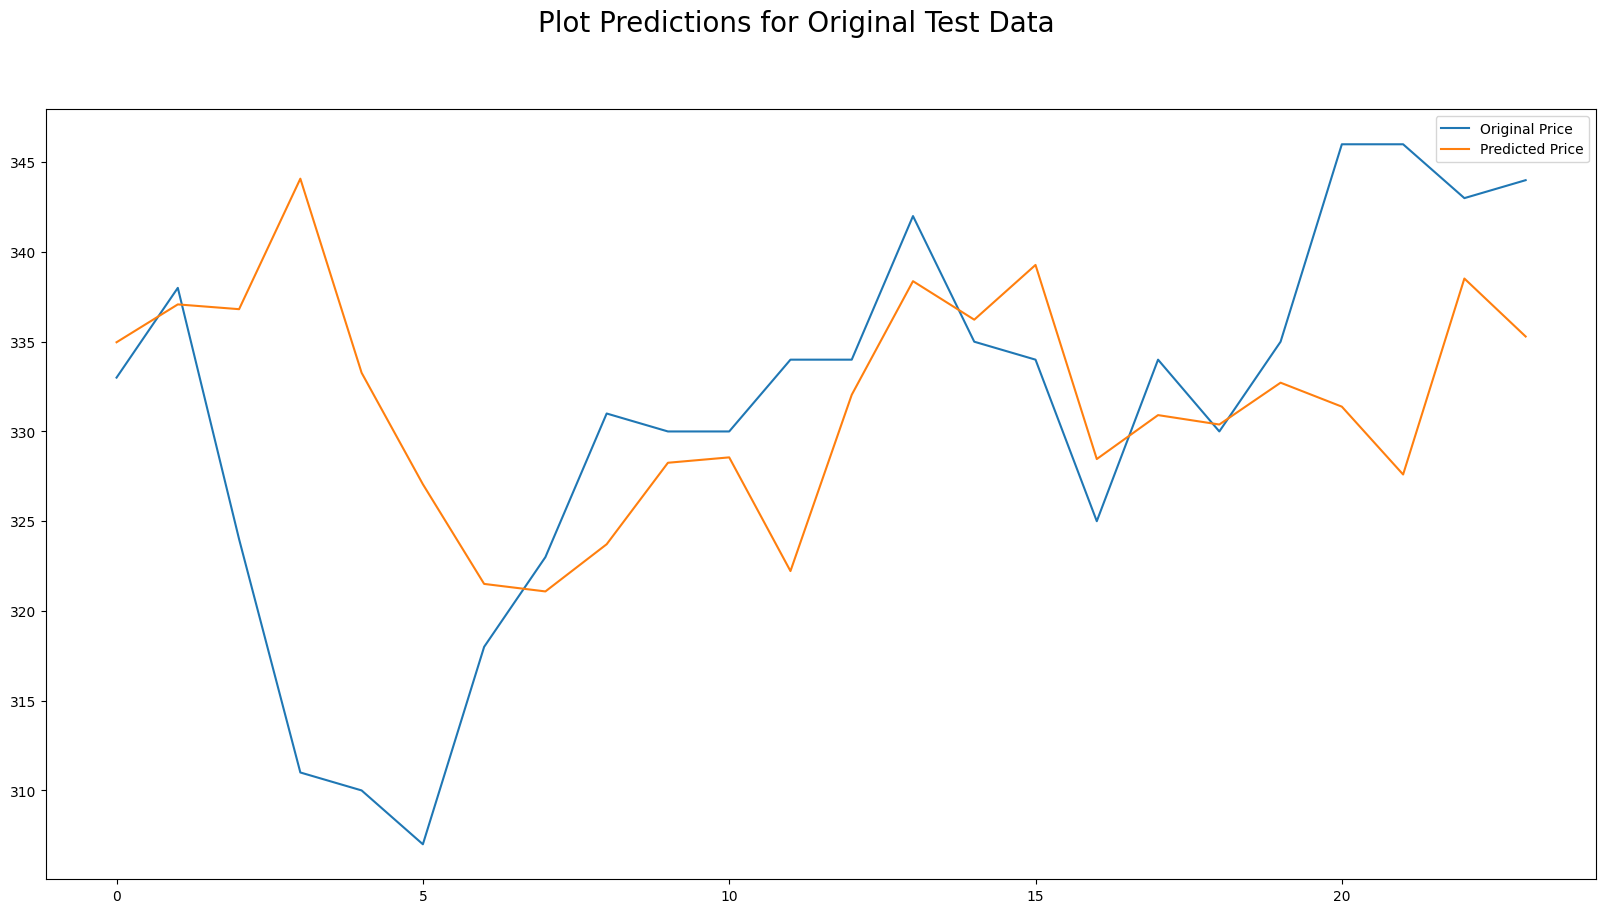

In [8]:
#Extract original test values that map to the same dates on the predicted test values
orig_test_values = prices[["Price"]].loc[total_size-len(predict_on_test):]
orig_test_values.reset_index(drop=True, inplace=True)

plt.figure(figsize=(20,10)).suptitle("Plot Predictions for Original Test Data", fontsize=20)
plt.plot(orig_test_values, label="Original Price")
plt.plot(predict_on_test, label="Predicted Price")
plt.legend()
plt.show()

Accuracy can be increased by having more data points, creating more lookback and trying other RNN models

# Predictions

In [14]:
#Previous prices
previous_prices = np.array([325,335,340,341,342,
                            325,329,316,312,317,
                            324,330,328,332,336,
                            341,339,335,328,328,
                            341,348,343,341,339])

#Scale
scaled_prices = scaler.transform(previous_prices.reshape(-1, 1))
print(scaled_prices)
#Reshape
model_input = np.reshape(scaled_prices,
                         (scaled_prices.shape[1],1, scaled_prices.shape[0]))
print(model_input)

#predictions
prediction = price_model.predict(model_input)

#scale back
norm_prediction = scaler.inverse_transform(prediction)

print("The predicted Stock price is :", norm_prediction[0][0])

[[ 0.11082241]
 [ 0.39788561]
 [ 0.54141722]
 [ 0.57012354]
 [ 0.59882986]
 [ 0.11082241]
 [ 0.22564769]
 [-0.14753448]
 [-0.26235976]
 [-0.11882816]
 [ 0.08211609]
 [ 0.25435401]
 [ 0.19694137]
 [ 0.31176665]
 [ 0.42659193]
 [ 0.57012354]
 [ 0.5127109 ]
 [ 0.39788561]
 [ 0.19694137]
 [ 0.19694137]
 [ 0.57012354]
 [ 0.77106778]
 [ 0.62753618]
 [ 0.57012354]
 [ 0.5127109 ]]
[[[ 0.11082241  0.39788561  0.54141722  0.57012354  0.59882986
    0.11082241  0.22564769 -0.14753448 -0.26235976 -0.11882816
    0.08211609  0.25435401  0.19694137  0.31176665  0.42659193
    0.57012354  0.5127109   0.39788561  0.19694137  0.19694137
    0.57012354  0.77106778  0.62753618  0.57012354  0.5127109 ]]]
1/1 [==============================] - 0s 46ms/step
The predicted Stock price is : 330.2745
